In [1]:
%load_ext autoreload
%autoreload 2

import sys

sys.path.append("../src")

# Set seeds for reproducible examples

In [2]:
from src.seeded import tf, seed

# Load MURA dataset

In [3]:
from src.MuraLoader import MuraLoader

muraLoader = MuraLoader()
train_set, validation_set, test_set = muraLoader.get_sets(split=0.2)

In [4]:
train_set.groupby(['StudyLabel']).size().reset_index(name='counts')

,StudyLabel,counts
0,0,17548
1,1,11898


In [5]:
validation_set.groupby(['StudyLabel']).size().reset_index(name='counts')

,StudyLabel,counts
0,0,4387
1,1,2975


In [6]:
test_set.groupby(['StudyLabel']).size().reset_index(name='counts')

,StudyLabel,counts
0,0,1667
1,1,1530


In [7]:
# train_set.groupby('StudyLabel').hist()

In [8]:
train_set.StudyLabel.unique()

array([0, 1])

In [9]:
train_generator, validation_generator, test_generator = muraLoader.get_generators(train_set, validation_set, test_set, batch_size=32)

Creating train generator
Found 29446 validated image filenames.
Creating validation generator
Found 7362 validated image filenames.
Creating test generator
Found 3197 validated image filenames.


In [10]:
train_generator_temp = muraLoader.get_generator(train_set)
batch = train_generator_temp.next()
images = batch[0]
categories = batch[1]

# print(images.shape)
# print(categories)

Found 29446 validated image filenames.


In [11]:
display(train_set)
display(validation_set)

,InitialImagePath,ImagePath,Dataset,Type,BodyPart,PatientNo,StudyNo,StudyLabelStr,StudyLabel,ImageFilename
35777,MURA-v1.1/train/XR_HAND/patient10910/study1_ne...,train/XR_HAND/patient10910/study1_negative/ima...,MURA-v1.1,train,XR_HAND,patient10910,study1,negative,0,image3.png
3722,MURA-v1.1/train/XR_SHOULDER/patient01200/study...,train/XR_SHOULDER/patient01200/study1_positive...,MURA-v1.1,train,XR_SHOULDER,patient01200,study1,positive,1,image4.png
32557,MURA-v1.1/train/XR_HAND/patient10064/study1_po...,train/XR_HAND/patient10064/study1_positive/ima...,MURA-v1.1,train,XR_HAND,patient10064,study1,positive,1,image1.png
26672,MURA-v1.1/train/XR_WRIST/patient08307/study1_n...,train/XR_WRIST/patient08307/study1_negative/im...,MURA-v1.1,train,XR_WRIST,patient08307,study1,negative,0,image2.png
33487,MURA-v1.1/train/XR_HAND/patient10296/study1_ne...,train/XR_HAND/patient10296/study1_negative/ima...,MURA-v1.1,train,XR_HAND,patient10296,study1,negative,0,image3.png
...,...,...,...,...,...,...,...,...,...,...
13164,MURA-v1.1/train/XR_FINGER/patient04328/study1_...,train/XR_FINGER/patient04328/study1_negative/i...,MURA-v1.1,train,XR_FINGER,patient04328,study1,negative,0,image2.png
12327,MURA-v1.1/train/XR_FINGER/patient04034/study1_...,train/XR_FINGER/patient04034/study1_negative/i...,MURA-v1.1,train,XR_FINGER,patient04034,study1,negative,0,image1.png
25792,MURA-v1.1/train/XR_WRIST/patient08066/study1_n...,train/XR_WRIST/patient08066/study1_negative/im...,MURA-v1.1,train,XR_WRIST,patient08066,study1,negative,0,image3.png
14873,MURA-v1.1/train/XR_ELBOW/patient04937/study1_p...,train/XR_ELBOW/patient04937/study1_positive/im...,MURA-v1.1,train,XR_ELBOW,patient04937,study1,positive,1,image4.png


,InitialImagePath,ImagePath,Dataset,Type,BodyPart,PatientNo,StudyNo,StudyLabelStr,StudyLabel,ImageFilename
23513,MURA-v1.1/train/XR_WRIST/patient07313/study1_p...,train/XR_WRIST/patient07313/study1_positive/im...,MURA-v1.1,train,XR_WRIST,patient07313,study1,positive,1,image1.png
26015,MURA-v1.1/train/XR_WRIST/patient08125/study1_n...,train/XR_WRIST/patient08125/study1_negative/im...,MURA-v1.1,train,XR_WRIST,patient08125,study1,negative,0,image3.png
3777,MURA-v1.1/train/XR_SHOULDER/patient01222/study...,train/XR_SHOULDER/patient01222/study1_positive...,MURA-v1.1,train,XR_SHOULDER,patient01222,study1,positive,1,image1.png
28277,MURA-v1.1/train/XR_WRIST/patient08759/study1_n...,train/XR_WRIST/patient08759/study1_negative/im...,MURA-v1.1,train,XR_WRIST,patient08759,study1,negative,0,image1.png
17057,MURA-v1.1/train/XR_ELBOW/patient05536/study1_n...,train/XR_ELBOW/patient05536/study1_negative/im...,MURA-v1.1,train,XR_ELBOW,patient05536,study1,negative,0,image2.png
...,...,...,...,...,...,...,...,...,...,...
4461,MURA-v1.1/train/XR_SHOULDER/patient01451/study...,train/XR_SHOULDER/patient01451/study1_negative...,MURA-v1.1,train,XR_SHOULDER,patient01451,study1,negative,0,image2.png
15958,MURA-v1.1/train/XR_ELBOW/patient05222/study1_p...,train/XR_ELBOW/patient05222/study1_positive/im...,MURA-v1.1,train,XR_ELBOW,patient05222,study1,positive,1,image1.png
34201,MURA-v1.1/train/XR_HAND/patient04382/study1_ne...,train/XR_HAND/patient04382/study1_negative/ima...,MURA-v1.1,train,XR_HAND,patient04382,study1,negative,0,image3.png
9452,MURA-v1.1/train/XR_HUMERUS/patient03131/study1...,train/XR_HUMERUS/patient03131/study1_negative/...,MURA-v1.1,train,XR_HUMERUS,patient03131,study1,negative,0,image2.png


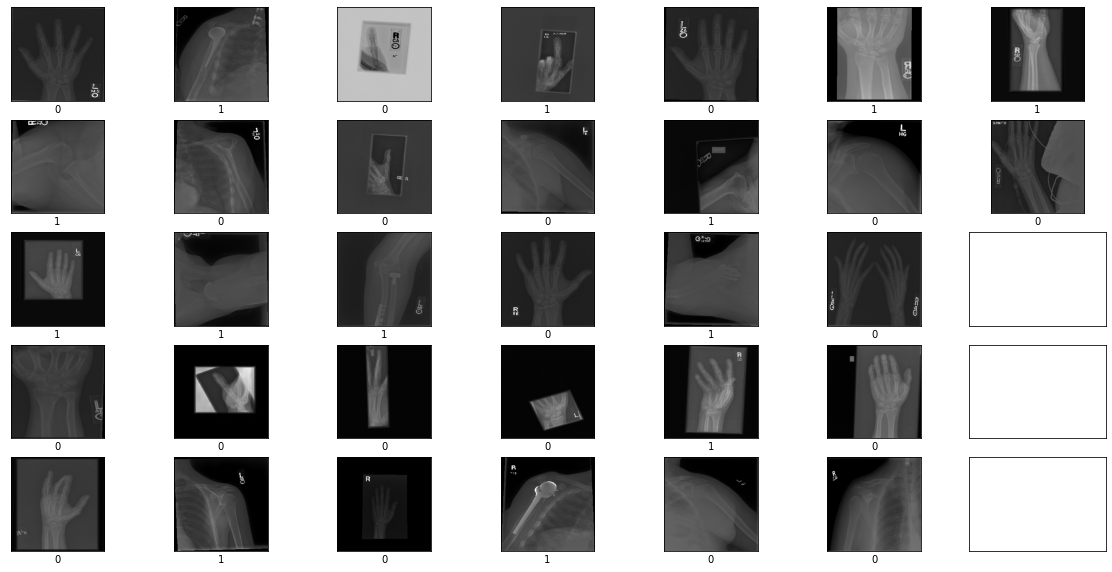

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

def display_mura(images, categories):
    rows = 5
    columns = 7
    fig, axis = plt.subplots(5, 7, figsize=(20, 10), sharex='col', sharey='row')

    for i in range(0, len(images)):
        ax = axis[int(i%5), int(i/5)]
        ax.imshow(images[i], cmap=plt.cm.binary)
        ax.set_xlabel(categories[i])
        
    for i in range(0, rows*columns):
        ax = axis[int(i%5), int(i/5)]
        ax.set_xticks([])
        ax.set_yticks([])
#         ax.axis('off')

display_mura(images, categories)

- https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet
- https://www.tensorflow.org/api_docs/python/tf/keras/applications/ResNet152

In [13]:
from sklearn.utils import class_weight
import numpy as np
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(train_set['StudyLabel']), y=train_set['StudyLabel'])

In [14]:
class_weights

array([0.83901299, 1.23743486])

https://towardsdatascience.com/understanding-and-coding-a-resnet-in-keras-446d7ff84d33


In general, an AUC of 0.5 suggests no discrimination (i.e., ability to diagnose patients with and without the disease or condition based on the test), 0.7 to 0.8 is considered acceptable, 0.8 to 0.9 is considered excellent, and more than 0.9 is considered outstanding

https://towardsdatascience.com/illustrated-10-cnn-architectures-95d78ace614d

# Resnet

In [ ]:
from src.models.builders import resnet152v2_builder, densenet201_builder

In [ ]:
modelStats = runner.run(name="resnet_default_max_pool", model=resnet152v2_builder(pooling='max'), overwrite=True, verbose=0)

In [ ]:
modelStats = runner.run(name="resnet_default_avg_pool", model=resnet152v2_builder(pooling='avg'), overwrite=True, verbose=0)

In [ ]:
densenet_model, densenet_history, densenet_evaluation, densenet_predictions = run_densenet201_model()